In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt

In [ ]:
tf.__version__

'2.17.1'

In [ ]:
np.__version__

'1.26.4'

In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')

In [ ]:
print("Num GPUs Available: ", len(physical_devices))

Num GPUs Available:  1


In [ ]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Example training images and their labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3]
Corresponding classes for the labels:['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat']


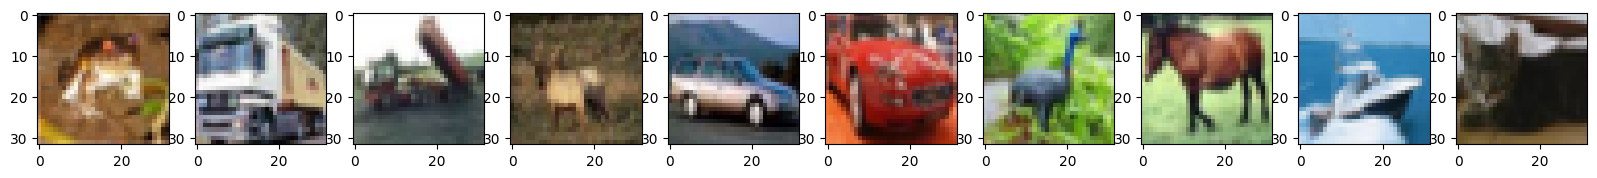

In [ ]:
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train [0:10]]))
print('Corresponding classes for the labels:' + str([cifar10_classes[x[0]] for x in y_train [0:10]]))

fig, axarr = plt.subplots(1, 10)
fig.set_size_inches (20, 6)
for i in range(10):
    image =x_train[i]
    axarr[i].imshow(image)
plt.show()

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
X_train = x_train / 255.0
X_test = x_test / 255.0


**CNN Model**

In [ ]:
from tensorflow import keras
from keras.layers import Dense
from keras.layers import Flatten

In [ ]:
ann =keras.Sequential()
ann.add(Flatten (input_shape=(32,32,3)))
ann.add(Dense (2048, activation='relu'))
ann.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2048)                │       6,293,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          20,490 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,313,994 (24.09 MB)

 Trainable params: 6,313,994 (24.09 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
ann.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history= ann.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.2853 - loss: 2.3202 - val_accuracy: 0.3974 - val_loss: 1.6902
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3930 - loss: 1.6971 - val_accuracy: 0.4020 - val_loss: 1.6844
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4205 - loss: 1.6155 - val_accuracy: 0.4386 - val_loss: 1.5869
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4453 - loss: 1.5664 - val_accuracy: 0.4547 - val_loss: 1.5296
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4581 - loss: 1.5287 - val_accuracy: 0.4473 - val_loss: 1.5472
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4641 - loss: 1.4971 - val_accuracy: 0.4506 - val_loss: 1.5302
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4699 - loss: 1.4832 - val_accuracy: 0.4643 - val_loss: 1.5211
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4797 - loss: 1.4662 -

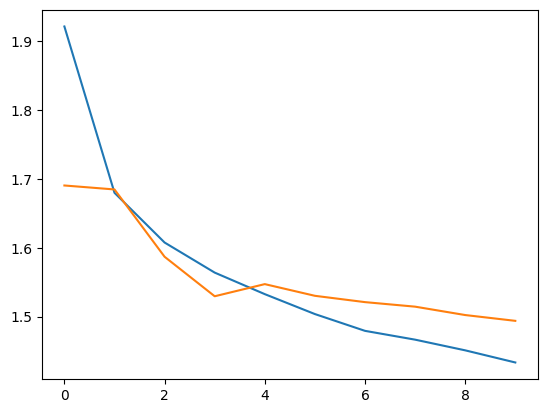

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
from tensorflow import keras
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout

In [ ]:
cnn = keras.Sequential()
cnn.add(Conv2D(32, kernel_size= (3,3), strides=(1,1), padding='same', activation ='relu', input_shape = (32,32,3)))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(64, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(128, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(256, kernel_size= (3,3), strides=(1,1), padding='same', activation ='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Flatten())
cnn.add(Dense (64, activation= 'relu')) #hidden layer
cnn.add(Dropout(0.3))
cnn.add(Dense(10, activation='softmax')) #output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 454,666 (1.73 MB)

 Trainable params: 454,666 (1.73 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
# Train the model
history = cnn.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.3074 - loss: 1.8500 - val_accuracy: 0.5804 - val_loss: 1.1663
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.5734 - loss: 1.2042 - val_accuracy: 0.6666 - val_loss: 0.9431
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6643 - loss: 0.9738 - val_accuracy: 0.6937 - val_loss: 0.8938
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7123 - loss: 0.8307 - val_accuracy: 0.7161 - val_loss: 0.8280
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7580 - loss: 0.7112 - val_accuracy: 0.7330 - val_loss: 0.7877
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7859 - loss: 0.6275 - val_accuracy: 0.7028 - val_loss: 0.8756
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8132 - loss: 0.5455 - val_accuracy: 0.7244 - val_loss: 0.8817
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8379 - loss: 0.4

In [ ]:
def plotAccuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

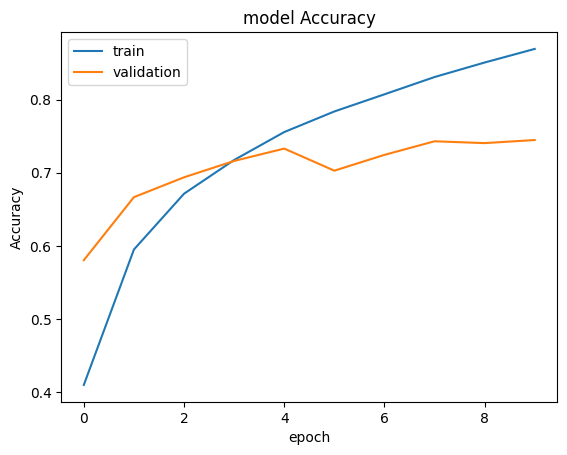

In [ ]:
plotAccuracy(history)

In [ ]:
score = cnn.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7433 - loss: 0.8958
Test loss: 0.8863356709480286
Test accuracy: 0.744700014591217


In [ ]:
from keras.models import load_model
cnn.save('cnn_model.h5')

In [ ]:
from google.colab import files  # Import necessary module for Colab
files.download('cnn_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>